In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets, metrics, model_selection, svm
import statsmodels.api as sm
import shap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h4>Read in building and electical consumption data</H4>

In [2]:
# read in electricity consumption and building data
kwh_year_df = pd.read_csv('clean-data/kwh_year.csv')

In [3]:
kwh_year_df = kwh_year_df.drop(columns=['Unnamed: 0', 'index'])

In [4]:
kwh_year_df = kwh_year_df.drop(columns=['Service Address'])

In [5]:
kwh_year_df

avg_kwh   Latitude  Longitude  Parcel Number  prop_id  \
0         726.077670  29.705149 -82.361609     6014021030    32391   
1        2758.873786  29.679885 -82.353693     9004018000    78433   
2        2758.873786  29.679885 -82.353693     9004018000    78433   
3        2758.873786  29.679885 -82.353693     9004018000    78433   
4        2758.873786  29.679885 -82.353693     9004017000    78432   
5       12088.951456  29.632235 -82.361566     6757005121    56828   
6       12088.951456  29.632235 -82.361566     6757005344    56955   
7       12088.951456  29.632235 -82.361566     6757005251    56910   
8       12088.951456  29.632235 -82.361566     6757005202    56861   
9       12088.951456  29.632235 -82.361566     6757005337    56948   
10        851.421569  29.615910 -82.355323     7284300204    67343   
11        701.631068  29.684978 -82.359243     6091020055    39590   
12        865.087379  29.701265 -82.363532     6076500037    38467   
13       1008.291262  29.655424 -82.374040     6482097000    49358   
14      11822.099476  29.702824 -82.388840     6070010001    37354   
15      11822.099476  29.702824 -82.388840     6070010001    37354   
16      11822.099476  29.702824 -82.388840     6070010001    37354   
17       1597.485437  29.721874 -82.397208     6006030004    30726   
18       6227.148515  29.674986 -82.314800     8220000000    75950   
19        670.929293  29.674986 -82.314800     8220000000    75950   
20        344.123711  29.674986 -82.314800     8220000000    75950   
21        413.029703  29.674986 -82.314800     8220000000    75950   
22        312.530000  29.674986 -82.314800     8220000000    75950   
23        523.495050  29.674986 -82.314800     8220000000    75950   
24        566.455446  29.674986 -82.314800     8220000000    75950   
25        722.310000  29.674986 -82.314800     8220000000    75950   
26        705.673267  29.674986 -82.314800     8220000000    75950   
27        341.247525  29.674986 -82.314800     8220000000    75950   
28        482.603960  29.674986 -82.314800     8220000000    75950   
29        520.673267  29.674986 -82.314800     8220000000    75950   
30        479.079208  29.674986 -82.314800     8220000000    75950   
31        388.702970  29.674986 -82.314800     8220000000    75950   
32        537.831683  29.674986 -82.314800     8220000000    75950   
33        482.693069  29.674986 -82.314800     8220000000    75950   
34        619.830000  29.674986 -82.314800     8220000000    75950   
35        492.217822  29.674986 -82.314800     8220000000    75950   
36        394.752475  29.674986 -82.314800     8220000000    75950   
37        466.683168  29.674986 -82.314800     8220000000    75950   
38        482.217822  29.674986 -82.314800     8220000000    75950   
39        505.130000  29.674986 -82.314800     8220000000    75950   
40        322.514851  29.674986 -82.314800     8220000000    75950   
41        401.118812  29.674986 -82.314800     8220000000    75950   
42        511.277228  29.674986 -82.314800     8220000000    75950   
43        540.188119  29.674986 -82.314800     8220000000    75950   
44        430.138614  29.674986 -82.314800     8220000000    75950   
45        610.851485  29.674986 -82.314800     8220000000    75950   
46        481.257426  29.674986 -82.314800     8220000000    75950   
47        392.350000  29.658539 -82.324059    14156008000    88304   
48        738.291262  29.663946 -82.335654     9589000000    80148   
49       1814.087379  29.624460 -82.377379     6810001009    57673   
50        714.883495  29.633913 -82.343407    15486000000    89985   
51        717.407767  29.633913 -82.343407    15486000000    89985   
52       4776.252427  29.711939 -82.354053     7879002000    72821   
53        806.182796  29.668426 -82.328773    10008000000    80840   
54        410.478261  29.668426 -82.328773    10008000000    80840   
55        410.478261  29.668426 -82.328773    10008000000    80840   
56        629.108911  2

<h4>Identify colinear features</h4>

In [9]:
kwh_year_df.corr()

avg_kwh  Latitude  Longitude  Parcel Number   prop_id  \
avg_kwh            1.000000 -0.079952  -0.018102       0.010132  0.026818   
Latitude          -0.079952  1.000000  -0.134391      -0.377149 -0.498860   
Longitude         -0.018102 -0.134391   1.000000       0.680909  0.775367   
Parcel Number      0.010132 -0.377149   0.680909       1.000000  0.849588   
prop_id            0.026818 -0.498860   0.775367       0.849588  1.000000   
Effective_YrBlt    0.063023  0.046609  -0.262894      -0.154652 -0.215820   
Heated_SquareFeet  0.185103 -0.017014  -0.091056      -0.058992 -0.068158   
Stories            0.076795 -0.136254  -0.083666       0.021543  0.010378   
kwh_per_sqft       0.508535 -0.098716   0.010590       0.048703  0.055169   
code_release       0.064757  0.048259  -0.264918      -0.155143 -0.216317   

                   Effective_YrBlt  Heated_SquareFeet   Stories  kwh_per_sqft  \
avg_kwh                   0.063023           0.185103  0.076795      0.508535   
Latitude                  0.046609          -0.017014 -0.136254     -0.098716   
Longitude                -0.262894          -0.091056 -0.083666      0.010590   
Parcel Number            -0.154652          -0.058992  0.021543      0.048703   
prop_id                  -0.215820          -0.068158  0.010378      0.055169   
Effective_YrBlt           1.000000           0.028064  0.024884      0.069811   
Heated_SquareFeet         0.028064           1.000000  0.474447     -0.035214   
Stories                   0.024884           0.474447  1.000000     -0.067929   
kwh_per_sqft              0.069811          -0.035214 -0.067929      1.000000   
code_release              0.993516           0.030020  0.029459      0.067824   

                   code_release  
avg_kwh                0.064757  
Latitude               0.048259  
Longitude             -0.264918  
Parcel Number         -0.155143  
prop_id               -0.216317  
Effective_YrBlt        0.993516  
Heated_SquareFeet      0.030020  
Stories                0.029459  
kwh_per_sqft           0.067824  
code_release           1.000000

<h4>Remove colinear features</h4>

In [10]:
col_kwh_year_df = kwh_year_df.drop(columns=['prop_id', 'Parcel Number', 'Effective_YrBlt', 'Stories']) 
col_kwh_year_df.columns

Index(['avg_kwh', 'Latitude', 'Longitude', 'Heated_SquareFeet', 'kwh_per_sqft',
       'code_release'],
      dtype='object')

In [11]:
col_kwh_year_df.head()

avg_kwh   Latitude  Longitude  Heated_SquareFeet  kwh_per_sqft  \
0   726.077670  29.705149 -82.361609             1498.0      0.484698   
1  2758.873786  29.679885 -82.353693             2971.0      0.928601   
2  2758.873786  29.679885 -82.353693             2971.0      0.928601   
3  2758.873786  29.679885 -82.353693             2971.0      0.928601   
4  2758.873786  29.679885 -82.353693             1222.0      2.257671   

   code_release  
0            16  
1            18  
2            18  
3            18  
4            27

<h4>Define Target variable and feature set</h4>

In [12]:
y = col_kwh_year_df.pop('code_release')
X = col_kwh_year_df

<h4>Train, test split and instantiate linear regression models</h4>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50, random_state=1)

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 5884 to 10209
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_kwh            5384 non-null   float64
 1   Latitude           5384 non-null   float64
 2   Longitude          5384 non-null   float64
 3   Heated_SquareFeet  5384 non-null   float64
 4   kwh_per_sqft       5384 non-null   float64
dtypes: float64(5)
memory usage: 252.4 KB


<h4>Set benchmark model</h4>

In [15]:
alpha = 3.0
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge(alpha=alpha)
knn = KNeighborsRegressor(7)

In [17]:
folds = 15
#score = mean_squared_error()
linear_cv = cross_val_score(linear, X, y, cv=folds, scoring='neg_mean_squared_error')
lasso_cv = cross_val_score(lasso, X, y, cv=folds, scoring='neg_mean_squared_error')
ridge_cv = cross_val_score(ridge, X, y, cv=folds, scoring='neg_mean_squared_error')
knn_cv = cross_val_score(knn, X, y, cv=folds, scoring='neg_mean_squared_error')

In [18]:
lin_cv_mean = linear_cv.mean()
lasso_cv_mean = lasso_cv.mean()
ridge_cv_mean = ridge_cv.mean()
knn_cv_mean = knn_cv.mean()


print(lin_cv_mean, lasso_cv_mean, ridge_cv_mean, knn_cv_mean)

-11.92922891037909 -12.133392446670138 -11.956216857917832 -13.353779333981198


<h4>Ordinary Least Squares</h4>

In [19]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.mse_total)
# print(est2.summary())

11.637038790448663


<h4>Run random forest regressor</h4>

In [20]:
# instantiate RF and linear regression model
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
mse

8.098779340421984

#### Train top performing model on test set to generate predictions for Dash app

In [21]:
X_test2 = X_train 
y_test2 = y_train 

In [22]:
X_train.head()

avg_kwh   Latitude  Longitude  Heated_SquareFeet  kwh_per_sqft
6410  1027.639344  29.705515 -82.364586             1516.0      0.677862
4903   766.774510  29.612746 -82.371744             1172.0      0.654244
367    544.843137  29.611465 -82.360356             5944.0      0.091663
2448  1026.689320  29.675848 -82.384052             1684.0      0.609673
4206   500.291262  29.635181 -82.343227             1120.0      0.446689

In [23]:
rf_pred = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
rf_pred.fit(X_test2, y_test2)

RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=5,
                      n_estimators=200)

In [24]:
y_hat_pred = rf_pred.predict(X_train)
# X_train.head()

In [36]:
y_hat_pred = pd.DataFrame(y_hat_pred)

#### Feature importance

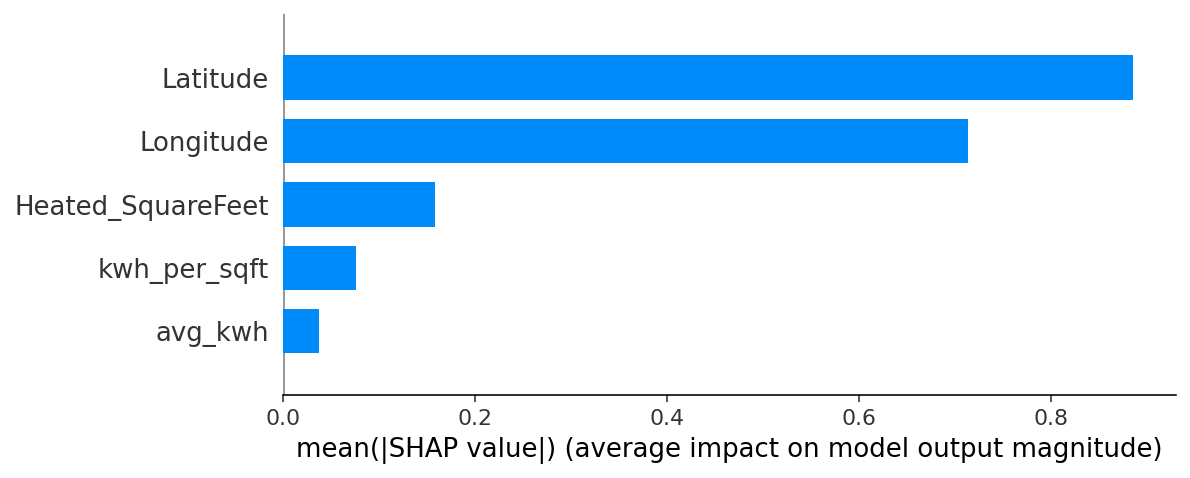

In [30]:
# rf 
shap_values = shap.TreeExplainer(rf_pred).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
#plt.savefig('images/shap_value.png')

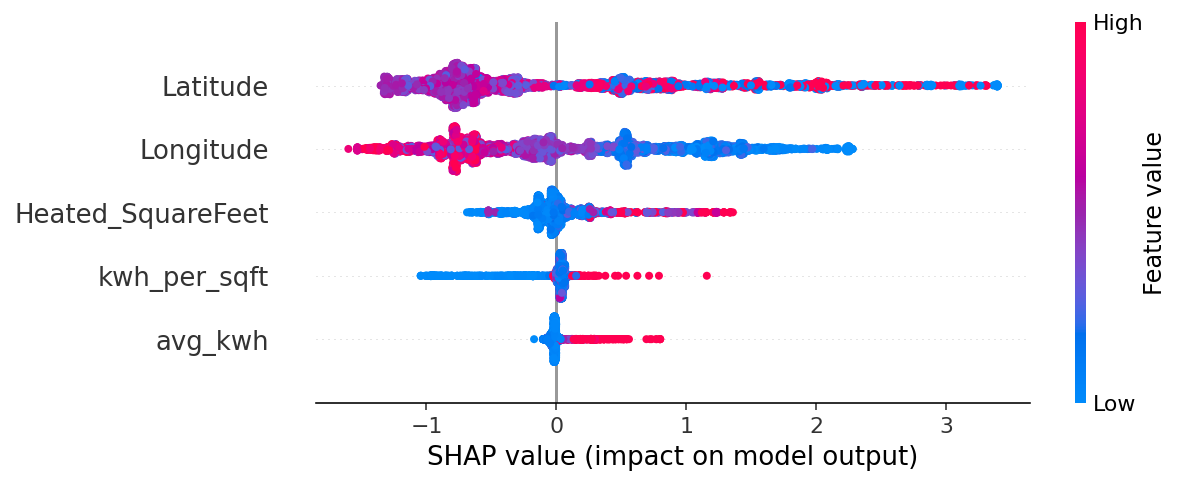

In [31]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
#plt.savefig('images/feat_imp_detailed.png')

<h4>Export predictions dataframe</h4>

In [37]:
# export predictions data for use in the carbon zero application
y_hat_pred.to_csv(r'stationary-data/y_hat_pred.csv', header=True)

In [38]:
# export training data to compare to predicted data 
# for efficiency val calc for prioritization of ee impr in Dash app
X_train.to_csv(r'stationary-data/X_train.csv', header=True)

In [39]:
# export y train for actual value in prediction feature engineering
# for efficiency val calc for prioritization of ee impr in Dash app
y_train.to_csv(r'stationary-data/y_train.csv', header=True)

In [40]:
# export training data to compare to predicted data 
# for efficiency val calc for prioritization of ee impr in Dash app
col_kwh_year_df.to_csv(r'stationary-data/col_kwh_year_df.csv', header=True)